# Wykonawca: Matsvei Volkau

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Describe Dataset

In [3]:
#Set the max number of rows 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Read the csv file
df = pd.read_csv('uncleaned-glassdoor.csv')

In [5]:
#show first 5 rows 
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [6]:
#Describe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1374 non-null   int64  
 1   Job Title          1212 non-null   object 
 2   Salary Estimate    1214 non-null   object 
 3   Job Description    1210 non-null   object 
 4   Rating             1204 non-null   float64
 5   Company Name       1230 non-null   object 
 6   Location           1204 non-null   object 
 7   Headquarters       1230 non-null   object 
 8   Size               1230 non-null   object 
 9   Founded            1230 non-null   float64
 10  Type of ownership  1230 non-null   object 
 11  Industry           1210 non-null   object 
 12  Sector             1217 non-null   object 
 13  Revenue            1230 non-null   object 
 14  Competitors        1230 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 161.1+ KB


In [7]:
#Show number rows and columns in Dataset
print(f"Num of rows {df.shape[0]} and num of columns {df.shape[1]}")
print('-------------')

#Display number of NaN values
print(f'Num of Null values \n{df.isna().sum()}')
print('-------------')

#Display number of Duplicates rows
print(f'Num of dupluicated values {df.duplicated().sum()}')

Num of rows 1374 and num of columns 15
-------------
Num of Null values 
index                  0
Job Title            162
Salary Estimate      160
Job Description      164
Rating               170
Company Name         144
Location             170
Headquarters         144
Size                 144
Founded              144
Type of ownership    144
Industry             164
Sector               157
Revenue              144
Competitors          144
dtype: int64
-------------
Num of dupluicated values 575


In [8]:
#Show statistical Summary of Dataset
df.describe()

,index,Rating,Founded
count,1374.000000,1204.000000,1230.000000
mean,334.797671,3.523256,1642.097561
std,193.333810,1.426658,751.033460
min,0.000000,-1.000000,-1.000000
25%,168.250000,3.400000,1925.000000
50%,334.000000,3.800000,1995.000000
75%,501.750000,4.300000,2008.000000
max,671.000000,5.000000,2019.000000


In [9]:
#Calculate procentage of NaN values 
total_null_values_by_columns = round((df.isna().sum() / len(df) ) *100,2)
null_values_by_columns = total_null_values_by_columns.loc[total_null_values_by_columns > 0] # There are column more 0 procentage
null_values_by_columns 

Job Title            11.79
Salary Estimate      11.64
Job Description      11.94
Rating               12.37
Company Name         10.48
Location             12.37
Headquarters         10.48
Size                 10.48
Founded              10.48
Type of ownership    10.48
Industry             11.94
Sector               11.43
Revenue              10.48
Competitors          10.48
dtype: float64

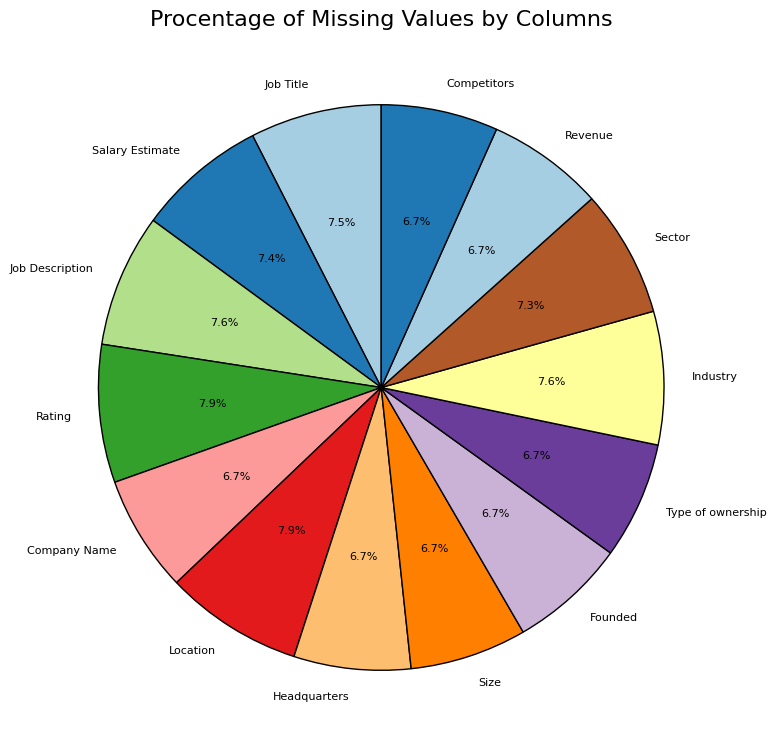

In [10]:
plt.figure(figsize=(8,8))
plt.pie(null_values_by_columns,
        labels=null_values_by_columns.index,
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors, 
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 8, 'fontweight': 'light'}
        )


plt.title('Procentage of Missing Values by Columns', fontsize=16)
plt.tight_layout()
plt.show()

## 5.Prepare Data to Cleaning

In [11]:
# Drop columns index with save oroginal Dataset
df.drop(columns='index',inplace=True)

#drop Rows ,where all columns NaN values 
df.dropna(how='all',inplace=True)

In [12]:
# Show Nan Values after removing all rows consist of NaN values
df.isna().sum()

Job Title            18
Salary Estimate      16
Job Description      20
Rating               26
Company Name          0
Location             26
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry             20
Sector               13
Revenue               0
Competitors           0
dtype: int64

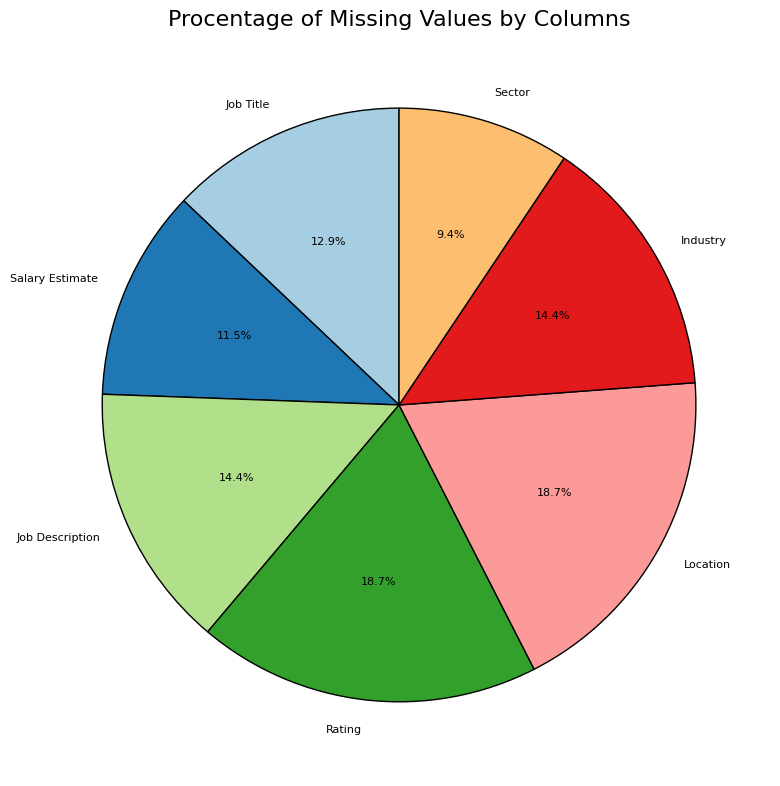

In [13]:
#Calculate procentage of NaN values per Columns
total_null_values = round((df.isna().sum() / len(df) ) *100,2)
null_values = total_null_values.loc[total_null_values > 0]
null_values


#Draw pie chart to vizualizate it 
plt.figure(figsize=(8,8))
plt.pie(null_values,
        labels=null_values.index,
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors, 
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 8, 'fontweight': 'light'}
        )


plt.title('Procentage of Missing Values by Columns', fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
#Drop Duplicate rows from Dataset
df.drop_duplicates(inplace=True)
print(f'Num of Duplicated values: {df.duplicated().sum()}')

Num of Duplicated values: 0


In [15]:
# Delete rows with NaN values by Job Title
df.dropna(subset=['Job Title'], inplace=True)

#Make Job Title clear ,deleting incorrect letter .etd
df['Job Title'] = df['Job Title'].str.replace(r',.*', '', regex=True).str.replace(r'-.*', '', regex=True)
df['Job Title'] = df['Job Title'].str.replace(r'\(.*\)', '', regex=True).str.replace(r'\(.*$', '', regex=True)
df['Job Title'] = df['Job Title'].str.replace('Sr.','Senior').str.replace('Sr','Senior').str.title().str.strip(' ')



/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_22573/3324549265.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=Top_profeccion, x='Job Title',y='Total',palette='Set2')


Text(0, 0.5, 'Total')

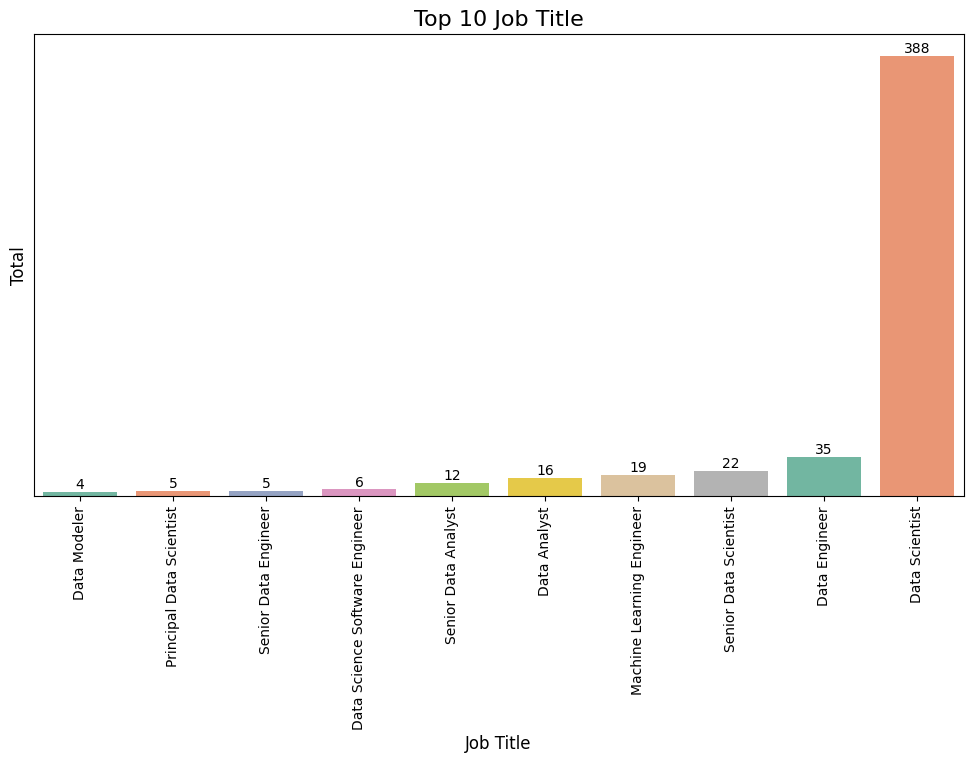

In [16]:
#Calculate quantity offers by Job Title
Top_profeccion = df['Job Title'].value_counts().reset_index(name='Total').head(10).sort_values(by='Total')

#draw a bar chart to show it 
plt.figure(figsize=(12,6))
ax = sns.barplot(data=Top_profeccion, x='Job Title',y='Total',palette='Set2')

#Display a number of offers for each bar 
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Top 10 Job Title',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Job Title',fontsize=12)
plt.yticks([])#Delete y-Headers
plt.ylabel('Total',fontsize=12)

In [17]:
#Split Salary to Min/Max columns,delete all text 
df['Minimal Salary'] = df['Salary Estimate'].str.replace(' (Glassdoor est.)','').str.replace('(Employer est.)','').str.replace('$','').str.split('-').str[0]
df['Maximum Salary'] = df['Salary Estimate'].str.replace(' (Glassdoor est.)','').str.replace('(Employer est.)','').str.replace('$','').str.split('-').str[-1]

#Drop Salary column after spliting
df.drop(columns='Salary Estimate',inplace=True)

In [18]:
#Function for convert Salary to Thousands 
def clean_and_convert(x):
    if isinstance(x,str):
        return int(x.replace('K', '')) * 1000 # change the type of values
    elif isinstance(x,(int,float)):
        return x
    return None
        

#Apply function to Min/Max Columns
df['Minimal Salary'] = df['Minimal Salary'].apply(clean_and_convert)
df["Maximum Salary"] = df['Maximum Salary'].apply(clean_and_convert)

In [19]:
#Fill the NaN values base on the mean values  grouped Job title
df['Minimal Salary'] = df.groupby(by='Job Title')['Minimal Salary'].transform(lambda x: x.fillna(x.mean())).round(0)
df['Maximum Salary'] = df.groupby(by='Job Title')['Maximum Salary'].transform(lambda x: x.fillna(x.mean())).round(0)

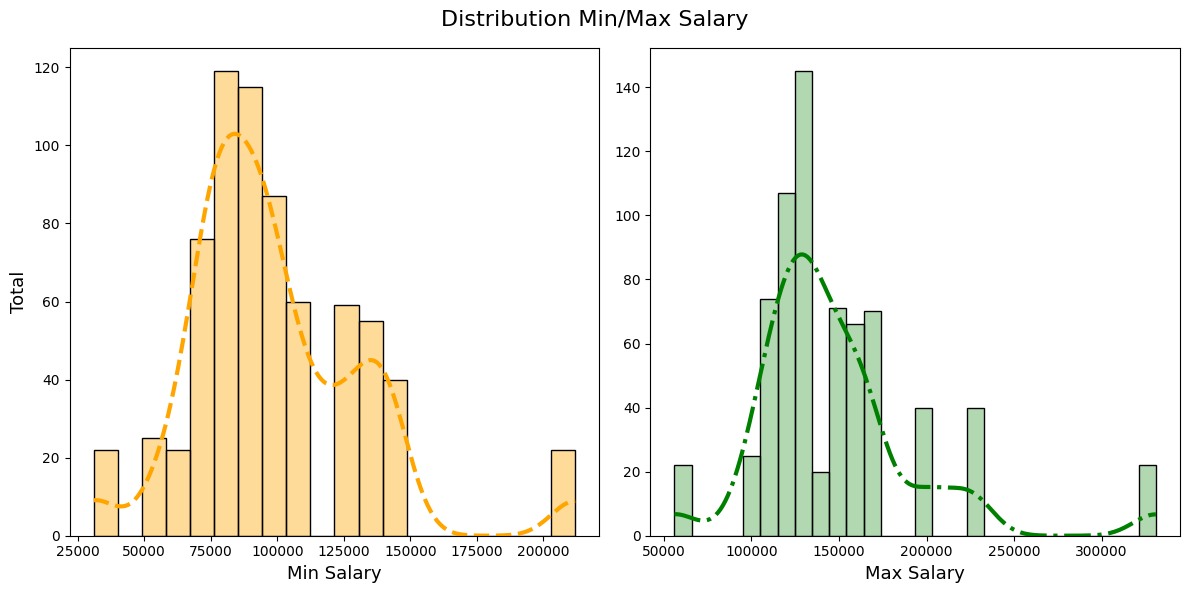

In [20]:
#Plotting a Histplot to describe Min/Max Values
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
ax1 = sns.histplot(data=df, x='Minimal Salary',kde=True,ax=ax1,color='orange',alpha=0.4,line_kws={'linewidth': 3, 
                                                                                                  'linestyle': '--'})
ax1.set_xlabel('Min Salary',fontsize=13)
ax1.set_ylabel('Total',fontsize=13)

ax2 = sns.histplot(data=df, x='Maximum Salary',kde=True,ax=ax2,color='green', alpha=0.3,line_kws={'linewidth': 3, 
                                                                                                  'linestyle': '-.'})
ax2.set_ylabel('')
ax2.set_xlabel('Max Salary',fontsize=13)


fig.suptitle('Distribution Min/Max Salary', fontsize=16)
plt.tight_layout()
plt.show()

In [21]:
#Clear column Rating
df['Rating'] = df['Rating'].apply(lambda x: None if x == -1 else x ) #change bad values to None
df['Rating'] = df['Rating'].fillna(df['Rating'].mean()).round(1).astype(float) # fill in missing Values base on mean value 

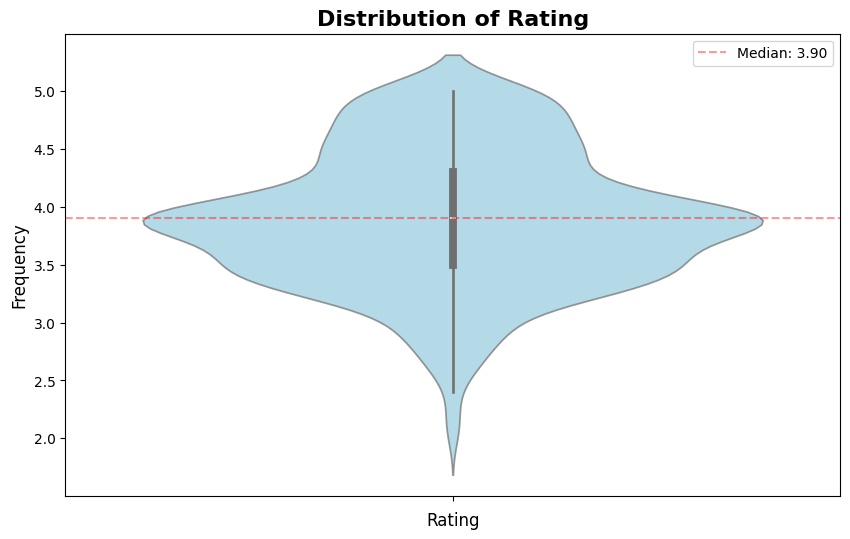

In [22]:
#Plotting a Violin plot to Desscribe Rating
plt.figure(figsize=(10,6))
sns.violinplot(data=df, y='Rating', color='skyblue', alpha=0.7)
median = df['Rating'].median()#calculate median of Rating
plt.axhline(median, color='red', linestyle='--',alpha=.4, label=f'Median: {median:.2f}')# Draw a median line 
plt.title('Distribution of Rating', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()#show legend
plt.show()

In [23]:
#Clear Company Name by deleteing incorrect values use a regex 
df['Company Name'] = df['Company Name'].str.replace(r'\n\d+\.\d+','',regex=True).str.title()

In [24]:

df.loc[df['Location'].isin(['Remote','United States']),'Location'] = 'Not Specified' #find all rows  including selecting values and change them

#split Location to 2 new rcolumns 
df['City'] = df['Location'].str.split(',').str[0].str.title()
df['State'] = df['Location'].str.split(',').str[-1]

#Fill in missing values 
df.fillna({'City': 'Not Specified', 'State': 'Not Specified'}, inplace=True)

In [25]:
#Split Headquartes columns to 2 new columns
df['Headquarters City'] = df['Headquarters'].str.split(',').str[0]
df['Headquarters State/Country'] = df['Headquarters'].str.split(',').str[-1]


In [26]:

#This code filters  based on the number of occurrences of the value -1 in each row. 
row_counts = (df == '-1').sum(axis=1)
df = df[row_counts <= 3] 


In [27]:

df['Num of Employees'] = df['Size'].str.replace(' to ',' - ').str.replace(' employees','')

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_22573/781132755.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Founded'] = df['Founded'].replace(-1, None).fillna(method='bfill').astype(int)
/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_22573/781132755.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Founded'] = df['Founded'].replace(-1, None).fillna(method='bfill').astype(int)


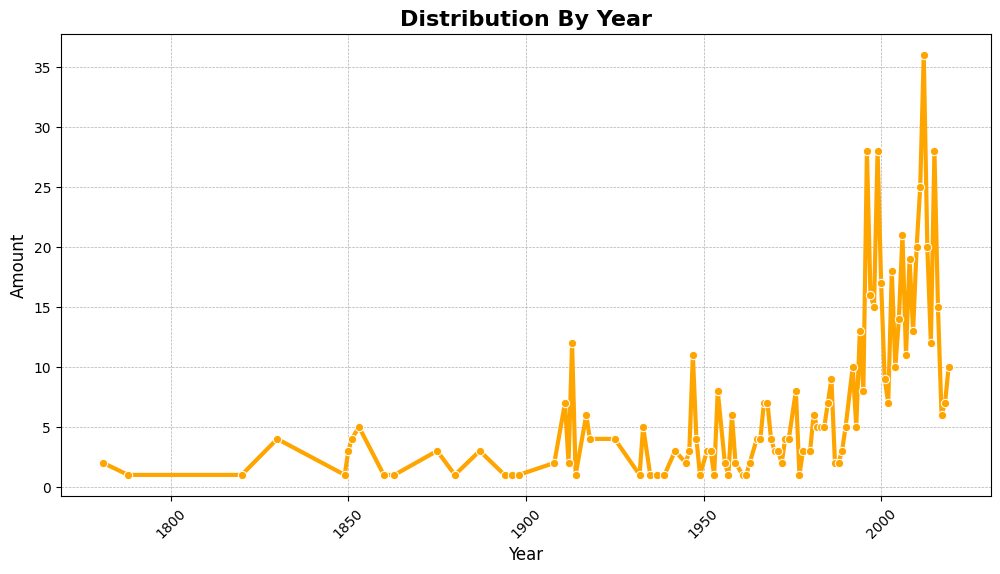

In [28]:
#Repalce "-1" To None and change the type
df['Founded'] = df['Founded'].replace(-1, None).fillna(method='bfill').astype(int)
df['Founded'] = pd.to_datetime(df['Founded'],format='%Y').dt.year # convert to datetime

#Calculate Number of Company per year
distribution_by_year = df['Founded'].value_counts().reset_index(name='Amount')

plt.figure(figsize=(12, 6))
sns.lineplot(data=distribution_by_year, x='Founded', y='Amount', color='orange', linewidth=3, marker='o', markersize=6)
plt.title('Distribution By Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

In [29]:
#Drop not needed columns
df.drop(columns=['Job Description','Location','Headquarters','Size'],inplace=True)

In [30]:
#Clean Type of Ownership
df['Type of ownership'] = df['Type of ownership'].str.replace('-',' ').str.replace('Other','').str.replace('Nonprofit','').str.replace(r'or.*', '', regex=True).str.strip(' ').str.title()
df['Type of ownership'] = df['Type of ownership'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [31]:
#Change incorrect values to None 
df['Industry'] = df['Industry'].apply(lambda x:None if x == '-1' else x)
df['Industry'] = df['Industry'].fillna('Not Specified') # fill in missing values

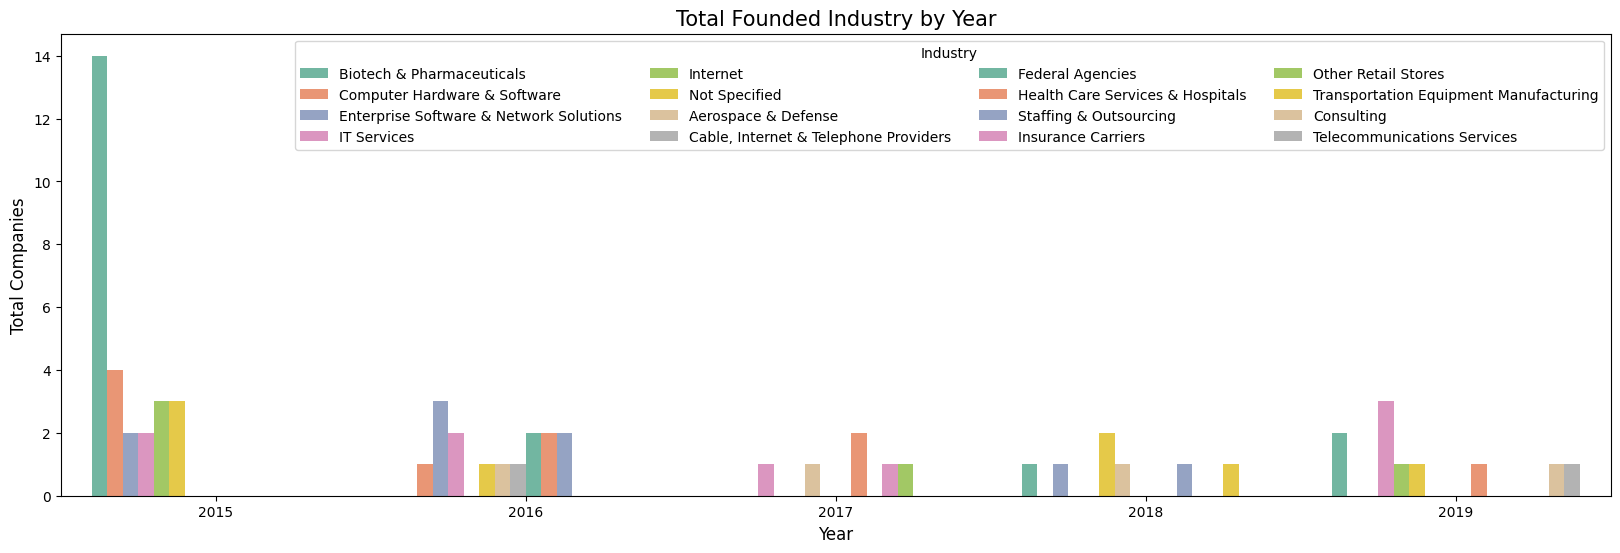

In [32]:
dist_per_industry = df.groupby(by=['Founded','Industry']).agg(total=('Founded','count')).reset_index().query('Founded >=2015')


plt.figure(figsize=(20,6))
sns.barplot(data=dist_per_industry , x='Founded', y='total',hue='Industry',dodge='stack',palette='Set2')
plt.title('Total Founded Industry by Year',fontsize=15)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Total Companies',fontsize=12)
plt.legend(title='Industry',ncol=4)
plt.show()

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_22573/1305472310.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_sector, x='Sector', y='Amount',palette='Set3')


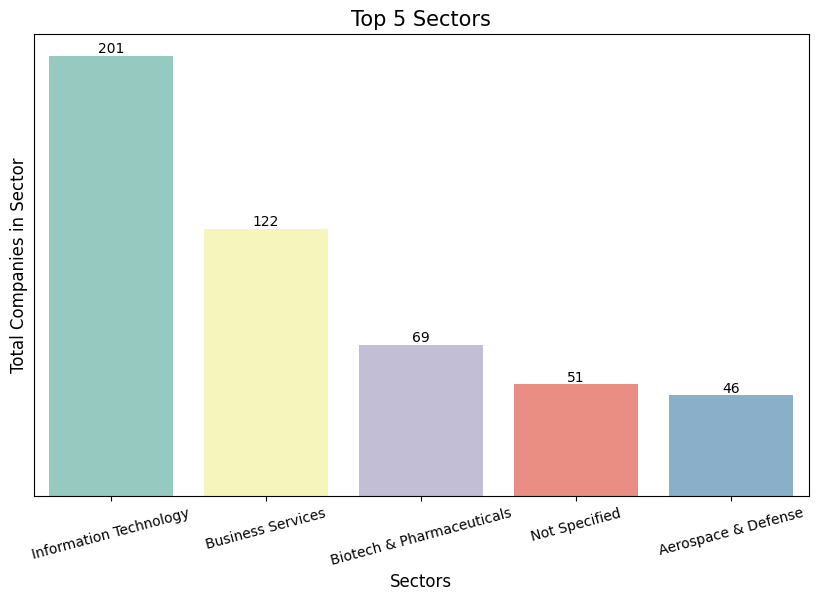

In [33]:

df['Sector'] = df['Sector'].apply(lambda x:None if x == '-1' else x)
df['Sector'] = df['Sector'].fillna('Not Specified')

#Calculate number of occurences by Sector
top_sector = df['Sector'].value_counts().reset_index(name='Amount').head()


plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_sector, x='Sector', y='Amount',palette='Set3')

#Display a number of offers for each bar 
for i in ax.containers:
    ax.bar_label(i,)
    

plt.title('Top 5 Sectors',fontsize=15)
plt.xlabel('Sectors',fontsize=12)
plt.xticks(rotation=15)
plt.ylabel('Total Companies in Sector',fontsize=12)
plt.yticks([])
plt.show()

In [34]:
#Function to clear Revenue Column
def clean_revenue(value):
    
    if "Unknown" in value:
        return None
    
     
    if "Less than" in value:
        return 0.5  
    
   
    if "+" in value:
        value = value.split()[0]  # Убираем "+"
        if "billion" in value:
            return float(value.replace('$', '')) * 1000  # Convert to million
        elif "million" in value:
            return float(value.replace('$', ''))  # alredy Million
    
    
    # Retrive number from col
    numbers = [float(s.replace('$', '').replace('million', '').replace('billion', '').replace('USD', '').strip())
               for s in re.findall(r'\d+\.?\d*', value)]
    
    if len(numbers) == 2:  # If len = 2 calculate mean of 2 numb
        average = sum(numbers) / 2
        if 'billion' in value:
            return average * 1000  # Convert to milliom
        else:
            return average  
    elif len(numbers) == 1:  
        if 'billion' in value:
            return numbers[0] * 1000  
        else:
            return numbers[0]  
    return value

#apply func to revenue col
df['Revenue'] = df['Revenue'].apply(clean_revenue)


#clear incorrect values
df.loc[df['Revenue'] == 10,'Revenue'] = 10 *1000
df.loc[df['Revenue'] == 250500,'Revenue'] = 375.0

In [35]:

#df['Revenue'] = df['Revenue'].replace('Unknown',None)

# fill in missing value by mean values grouped by Num of employees 
df['Revenue'] = df.groupby(by='Num of Employees')['Revenue'].transform(lambda x: x.fillna(x.mean())).round(0).astype(float)

In [36]:
#rename Name of cilumns in Dataset
df.rename(columns={'Job Title':'Job_Title',
                   'Company Name':'Company_Name',
                   'Type of ownership':'Type_of_Ownership',
                   'Num of Employees':'Size_of_Company'},inplace=True)



df.drop(columns=['Competitors'],inplace=True)
df.reset_index(drop=True, inplace=True) #reset index 

## 4.2 Analys of Data

In [37]:
def analyze_numeric(df,column):
    
        
        # Calculate key statistics
        unique_values = df[column].nunique()
        mean_val = df[column].mean()
        median_val = df[column].median()
        min_val = df[column].min()
        max_val = df[column].max()
        std_val = df[column].std()
        q25 = df[column].quantile(0.25)
        q75 = df[column].quantile(0.75)
        
       
        print(f"Liczba unikalnych wartości: {unique_values}")
        print(f"Średnia (Mean): {mean_val:.2f}")
        print(f"Mediana (Median): {median_val:.2f}")
        print(f"Min: {min_val}")
        print(f"Max: {max_val}")
        print(f"Odchylenie standardowe (Standard Deviation): {std_val:.2f}")
        print(f"25 percentyl (Q1): {q25:.2f}")
        print(f"75 percentyl (Q3): {q75:.2f}")
        print("\n")

categorical_columns = df.select_dtypes(include=(int,float)).columns
for col in categorical_columns:
    analyze_numeric(df, col)


Liczba unikalnych wartości: 31
Średnia (Mean): 3.89
Mediana (Median): 3.90
Min: 2.0
Max: 5.0
Odchylenie standardowe (Standard Deviation): 0.59
25 percentyl (Q1): 3.50
75 percentyl (Q3): 4.30


Liczba unikalnych wartości: 98
Średnia (Mean): 1983.76
Mediana (Median): 1999.00
Min: 1781
Max: 2019
Odchylenie standardowe (Standard Deviation): 40.41
25 percentyl (Q1): 1973.00
75 percentyl (Q3): 2010.00


Liczba unikalnych wartości: 19
Średnia (Mean): 1673.20
Mediana (Median): 300.00
Min: 0.0
Max: 10000.0
Odchylenie standardowe (Standard Deviation): 3156.95
25 percentyl (Q1): 38.00
75 percentyl (Q3): 1500.00


Liczba unikalnych wartości: 31
Średnia (Mean): 98407.09
Mediana (Median): 91000.00
Min: 31000.0
Max: 212000.0
Odchylenie standardowe (Standard Deviation): 33270.38
25 percentyl (Q1): 79000.00
75 percentyl (Q3): 122000.00


Liczba unikalnych wartości: 31
Średnia (Mean): 147057.51
Mediana (Median): 132000.00
Min: 56000.0
Max: 331000.0
Odchylenie standardowe (Standard Deviation): 47927.28
2

### 4.2 Rozkład zmiennych Kategorialnych

Analiz Kolumny:
	Job_Title 

Liczba unikalnych zmiennych: 120
Najczęściej spotykana zmienna: Data Scientist

Procent spotkanycz zmiennych
Job_Title
Data Scientist                    54.331865
Data Engineer                      5.139501
Senior Data Scientist              3.230543
Machine Learning Engineer          2.790015
Data Analyst                       2.349486
Senior Data Analyst                1.762115
Data Science Software Engineer     0.881057
Principal Data Scientist           0.734214
Senior Data Engineer               0.734214
Data Modeler                       0.587372
Name: count, dtype: float64


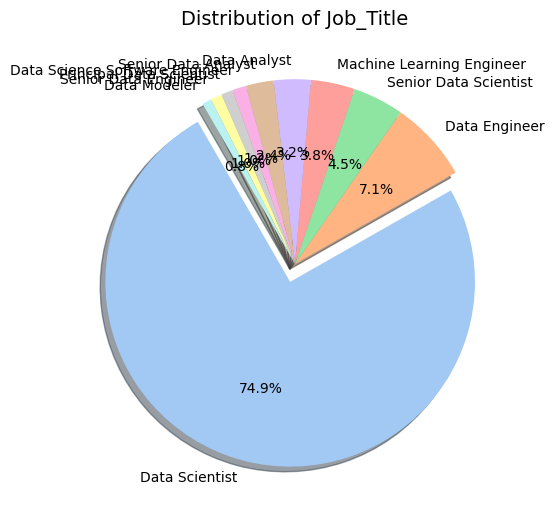

Analiz Kolumny:
	Company_Name 

Liczba unikalnych zmiennych: 386
Najczęściej spotykana zmienna: Tempus Labs

Procent spotkanycz zmiennych
Company_Name
Tempus Labs                     2.349486
Maxar Technologies              1.615272
Astrazeneca                     1.468429
Klaviyo                         1.468429
Autodesk                        0.881057
Phoenix Operations Group        0.881057
Southwest Research Institute    0.881057
Novetta                         0.881057
Mitre                           0.734214
Lsq                             0.734214
Name: count, dtype: float64


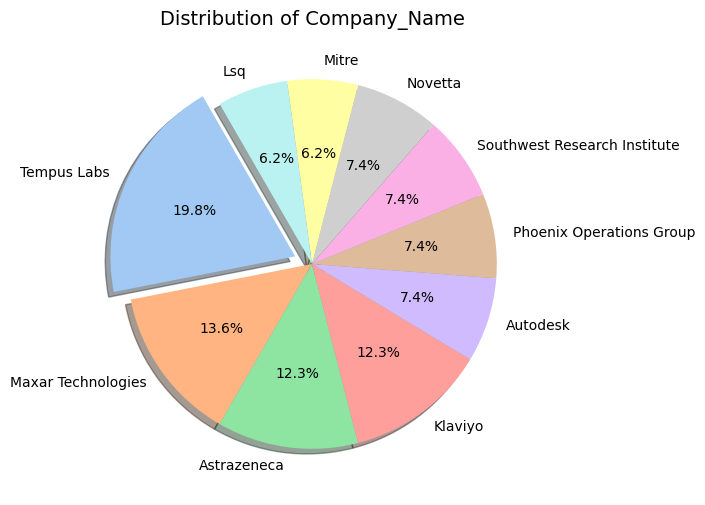

Analiz Kolumny:
	Type_of_Ownership 

Liczba unikalnych zmiennych: 10
Najczęściej spotykana zmienna: Company Private

Procent spotkanycz zmiennych
Type_of_Ownership
Company Private            62.555066
Company Public             23.201175
Organization                6.167401
Subsidiary                  4.698972
Government                  1.762115
Private Practice / Firm     0.734214
College / University        0.440529
Hospital                    0.146843
Contract                    0.146843
Self Employed               0.146843
Name: count, dtype: float64


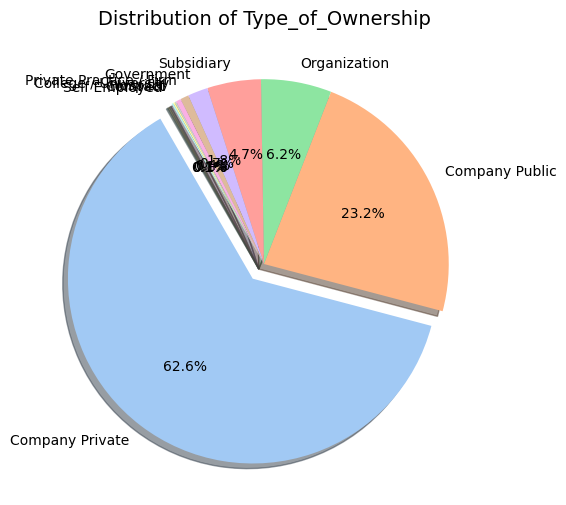

Analiz Kolumny:
	Industry 

Liczba unikalnych zmiennych: 54
Najczęściej spotykana zmienna: Biotech & Pharmaceuticals

Procent spotkanycz zmiennych
Industry
Biotech & Pharmaceuticals                  10.132159
IT Services                                 9.985316
Not Specified                               8.516887
Computer Hardware & Software                8.516887
Aerospace & Defense                         6.901615
Enterprise Software & Network Solutions     6.314244
Consulting                                  6.020558
Staffing & Outsourcing                      5.286344
Insurance Carriers                          4.111601
Internet                                    3.964758
Name: count, dtype: float64


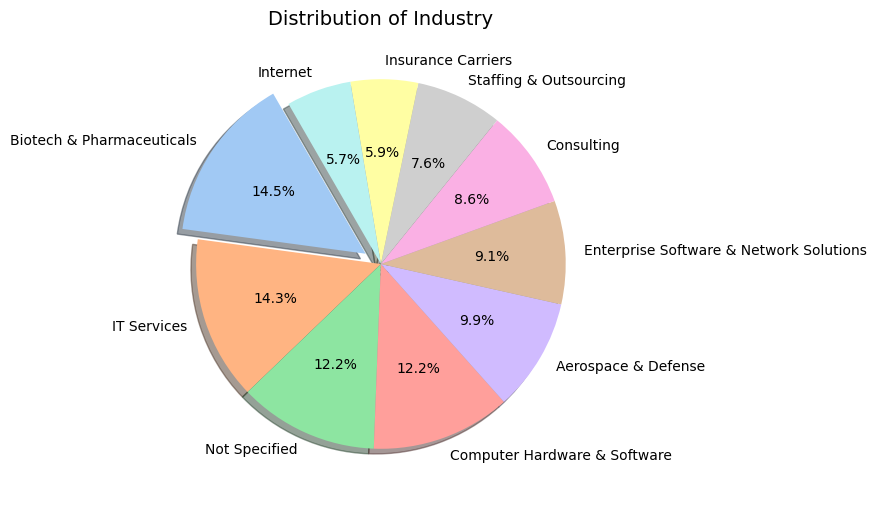

Analiz Kolumny:
	Sector 

Liczba unikalnych zmiennych: 22
Najczęściej spotykana zmienna: Information Technology

Procent spotkanycz zmiennych
Sector
Information Technology       29.515419
Business Services            17.914831
Biotech & Pharmaceuticals    10.132159
Not Specified                 7.488987
Aerospace & Defense           6.754772
Insurance                     5.139501
Finance                       4.845815
Manufacturing                 3.817915
Health Care                   3.524229
Government                    2.936858
Name: count, dtype: float64


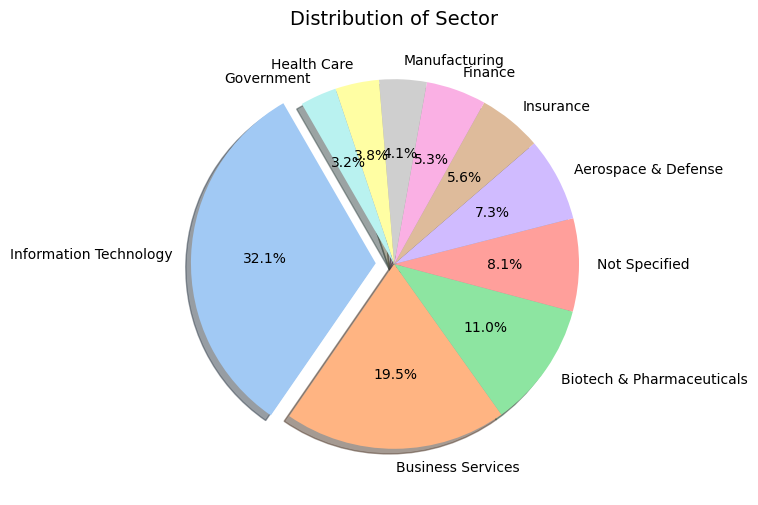

Analiz Kolumny:
	City 

Liczba unikalnych zmiennych: 184
Najczęściej spotykana zmienna: San Francisco

Procent spotkanycz zmiennych
City
San Francisco    8.516887
New York         7.195301
Not Specified    6.167401
Washington       3.964758
Boston           3.817915
Chicago          3.671072
Herndon          2.643172
Cambridge        2.055800
Mclean           1.908957
Santa Clara      1.468429
Name: count, dtype: float64


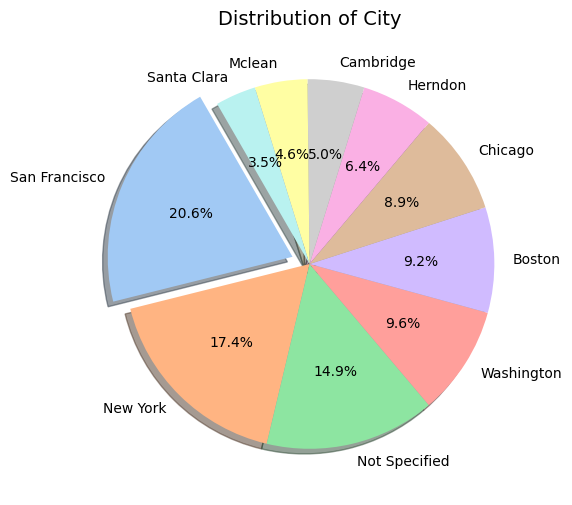

Analiz Kolumny:
	State 

Liczba unikalnych zmiennych: 42
Najczęściej spotykana zmienna:  CA

Procent spotkanycz zmiennych
State
 CA              22.466960
 VA              12.628488
 MA               8.516887
 NY               7.195301
Not Specified     6.167401
 MD               5.726872
 IL               4.552129
 DC               3.671072
 WA               2.643172
 TX               2.349486
Name: count, dtype: float64


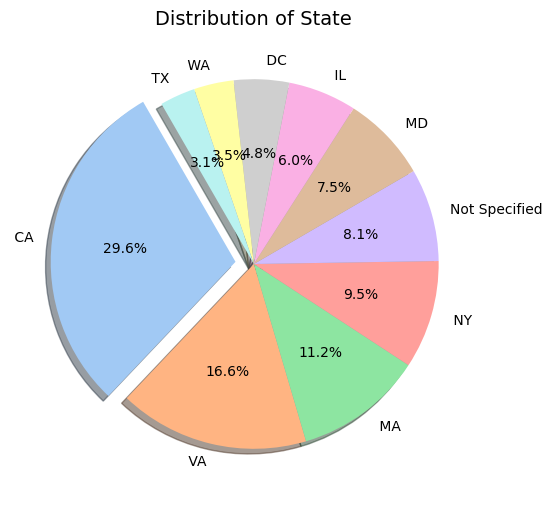

Analiz Kolumny:
	Headquarters City 

Liczba unikalnych zmiennych: 207
Najczęściej spotykana zmienna: New York

Procent spotkanycz zmiennych
Headquarters City
New York         5.580029
San Francisco    4.992658
Chicago          4.111601
Boston           3.230543
Cambridge        2.936858
Reston           2.202643
Mc Lean          2.055800
Westminster      1.615272
San Jose         1.468429
Bedford          1.321586
Name: count, dtype: float64


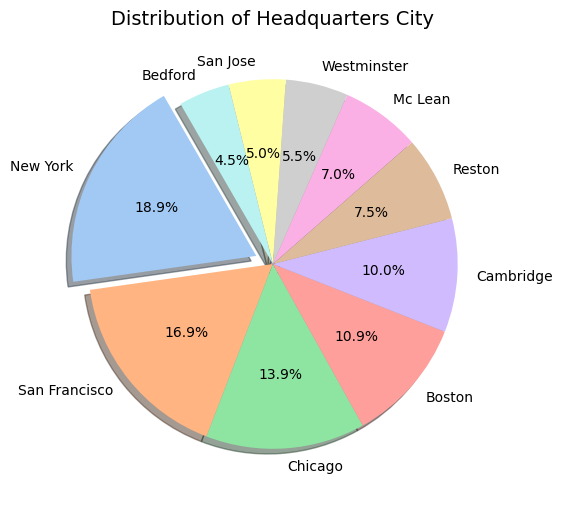

Analiz Kolumny:
	Headquarters State/Country 

Liczba unikalnych zmiennych: 44
Najczęściej spotykana zmienna:  CA

Procent spotkanycz zmiennych
Headquarters State/Country
CA    20.558003
VA    13.069016
MA     8.663730
NY     6.020558
IL     5.873715
NJ     5.873715
MD     5.433186
CO     2.790015
TX     2.790015
WA     2.496329
Name: count, dtype: float64


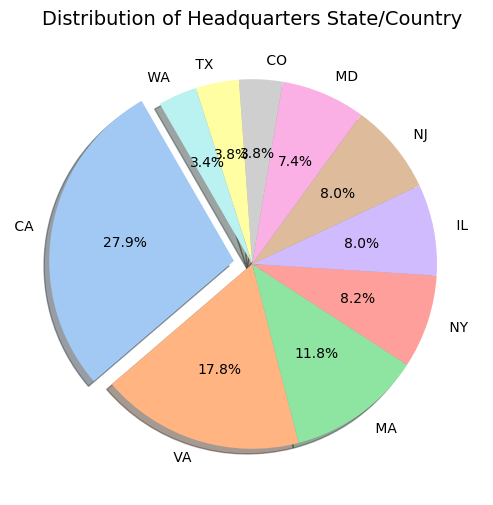

Analiz Kolumny:
	Size_of_Company 

Liczba unikalnych zmiennych: 8
Najczęściej spotykana zmienna: 51 - 200

Procent spotkanycz zmiennych
Size_of_Company
51 - 200        21.732746
1001 - 5000     16.152717
201 - 500       13.215859
1 - 50          12.922173
501 - 1000      12.481645
10000+          11.747430
5001 - 10000     9.104258
Unknown          2.643172
Name: count, dtype: float64


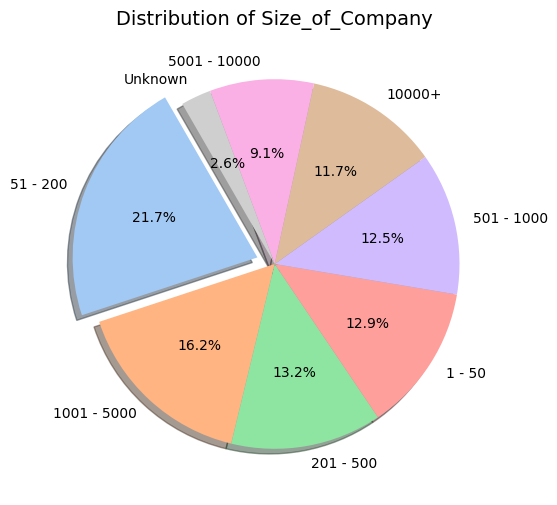

In [ ]:
def analyze_categorical(df, column):
    print(f"Analiz Kolumny:\n\t{column} ")
    
    
    unique_values = df[column].nunique()
    print(f"\nLiczba unikalnych zmiennych: {unique_values}")
    
    print(f'Najczęściej spotykana zmienna: {df[column].mode()[0]}')
    
    value_percent = (df[column].value_counts() / len(df) * 100).head(10)
    print("\nProcent spotkanycz zmiennych")
    print(value_percent)
    
    
    colors = sns.color_palette("pastel", len(value_percent))
    
    
    plt.figure(figsize=(8, 6))
    explode = [0.1 if i == 0 else 0 for i in range(len(value_percent))] #pull back the high-interest portion
    value_percent.plot(
        kind='pie', 
        autopct='%1.1f%%', 
        startangle=120, 
        colors=colors, 
        shadow=True, 
        explode=explode
    )
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.ylabel('')
    plt.show()

# for each object columns apply function 
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    analyze_categorical(df, col)


### 4.3 Korelacja zmiennych

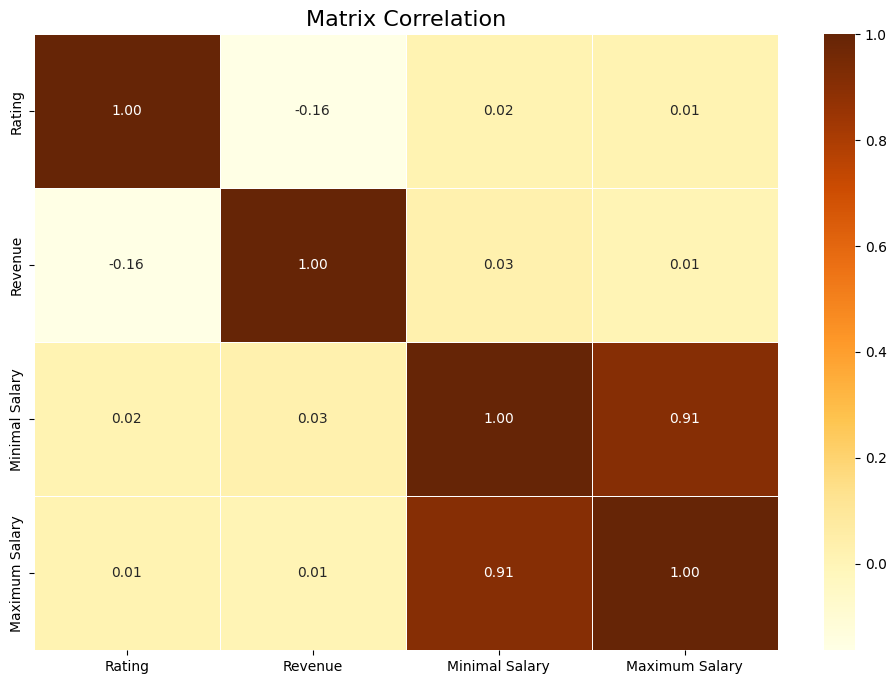

In [ ]:
#Calculate correlation for numerci columns
corrl_mat = df[['Rating','Revenue','Minimal Salary','Maximum Salary']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corrl_mat, annot=True, cmap='YlOrBr', fmt='.2f', linewidths=0.5)
plt.title('Matrix Correlation', fontsize=16)
plt.show()

In [ ]:
#Retain all colum this object type
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
#Retain all colum this numeric type
numeric_columns = df.select_dtypes(include=['number']).columns

all_correlations = {}


for cat_col in categorical_columns:
    
    encoded_series = df[cat_col].astype('category').cat.codes # convert categorial col to encoding into int valeus
    
    
    correlation = {}
    
    # for all encoding col calculate correlation
    for num_col in numeric_columns:
        correlation[num_col] = encoded_series.corr(df[num_col])
    
    #save correlation results
    all_correlations[cat_col] = correlation

# Print all correlations
for cat_col, correlations in all_correlations.items():
    print('----------------------------------')
    print(f"Correlations for Dimension: {cat_col} ---")
    for num_col, value in correlations.items():
        print(f"Correlation with {num_col}: {value}")


----------------------------------
Correlations for Dimension: Job_Title ---
Correlation with Rating: 0.004424817266745092
Correlation with Founded: 0.032615748728387246
Correlation with Revenue: -0.008564582700048355
Correlation with Minimal Salary: -0.010948155926756218
Correlation with Maximum Salary: -0.044247889659050736
----------------------------------
Correlations for Dimension: Company_Name ---
Correlation with Rating: 0.007525623778556585
Correlation with Founded: 0.07671402745649708
Correlation with Revenue: -0.014809118306048724
Correlation with Minimal Salary: -0.06393793005211411
Correlation with Maximum Salary: -0.0841834469571843
----------------------------------
Correlations for Dimension: Type_of_Ownership ---
Correlation with Rating: -0.09659163900472534
Correlation with Founded: -0.12628014805138155
Correlation with Revenue: 0.1243821266902582
Correlation with Minimal Salary: -0.004548609073298334
Correlation with Maximum Salary: -0.027092439316389397
------------

### Encodeing categoriacal Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_copy = df.copy()#copy original dataset
df_copy['Type_of_Ownership'] = encoder.fit_transform(df['Type_of_Ownership'])

df_copy.head()

,Job_Title,Rating,Company_Name,Founded,Type_of_Ownership,Industry,Sector,Revenue,Minimal Salary,Maximum Salary,City,State,Headquarters City,Headquarters State/Country,Size_of_Company
0,Senior Data Scientist,3.1,Healthfirst,1993,6,Insurance Carriers,Insurance,1314.0,137000.0,171000.0,New York,NY,New York,NY,1001 - 5000
1,Data Scientist,4.2,Mantech,1968,2,Research & Development,Business Services,1500.0,137000.0,171000.0,Chantilly,VA,Herndon,VA,5001 - 10000
2,Data Scientist,3.8,Analysis Group,1981,7,Consulting,Business Services,300.0,137000.0,171000.0,Boston,MA,Boston,MA,1001 - 5000
3,Data Scientist,3.5,Inficon,2000,2,Electrical & Electronic Manufacturing,Manufacturing,300.0,137000.0,171000.0,Newton,MA,Bad Ragaz,Switzerland,501 - 1000
4,Data Scientist,2.9,Affinity Solutions,1998,1,Advertising & Marketing,Business Services,49.0,137000.0,171000.0,New York,NY,New York,NY,51 - 200


#### Delete outliers

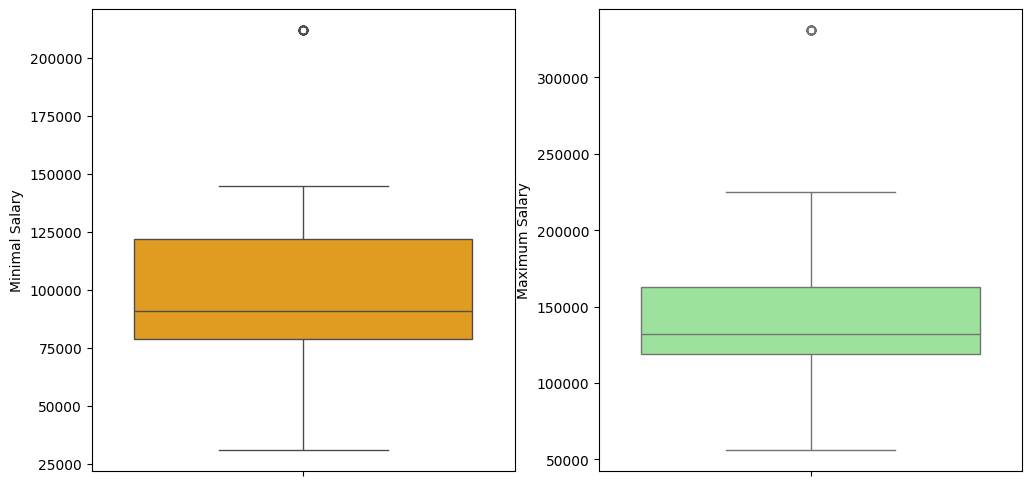

In [ ]:
#Display outliers from Min/Max Columns
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
ax1 = sns.boxplot(data=df,y='Minimal Salary',ax=ax1,color='orange')
ax2 = sns.boxplot(data=df, y ='Maximum Salary', ax=ax2,color='lightgreen')

In [ ]:
#Delete outliers from Dataset
Q1 = df_copy['Minimal Salary'].quantile(0.25)
Q3 = df_copy['Minimal Salary'].quantile(0.75)
IQR = Q3 - Q1
below_bounder=Q1 -1.5 * IQR
Upper_bounder = Q3 + 1.5 * IQR
df_copy = df_copy[~((df_copy['Minimal Salary'] < below_bounder) | (df_copy['Minimal Salary'] > Upper_bounder))]

In [ ]:
#Delete outliers from Dataset
Q1 = df_copy['Maximum Salary'].quantile(0.25)
Q3 = df_copy['Maximum Salary'].quantile(0.75)
IQR = Q3 - Q1
below_bounder=Q1 -1.5 * IQR
Upper_bounder = Q3 + 1.5 * IQR
df_copy = df_copy[~((df_copy['Maximum Salary'] < below_bounder) | (df_copy['Maximum Salary'] > Upper_bounder))]

In [46]:
df_copy.shape

(598, 15)

### Podział na zbiory treningowe i testowe

In [ ]:
from sklearn.model_selection import train_test_split

X = df_copy.drop('Revenue', axis=1) #  Dropm target colum (parametrs columns)
y = df_copy['Revenue'] #target column

#split Dataset to train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#save tretng dataset
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)


#save test dataset
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

